# Data cleaning and exploration

---
**Data Fields**

*  *Tweet* - This is the text that was tweeted
*  *following* -The number of people the account that tweeted is following
*  *followers* - The number of people following the account that tweeted
*  *actions* - The total number of favorites, replies, and retweets of said tweet
*  *is_retweet* - Binary [0,1] value: If 0 its not a retweet, if 1 it is a retweet
*  *location* - The self-written location provided by the user on their profile, May not exist, be "Unkown", and is NOT standardized! ex. could be ("NY", "New York", "Upper East Side", Etc!)

*  *Type* - Either Quality or Spam





[Link para o dataset](https://www.kaggle.com/c/utkmls-twitter-spam-detection-competition/data?select=sample_submission.csv)

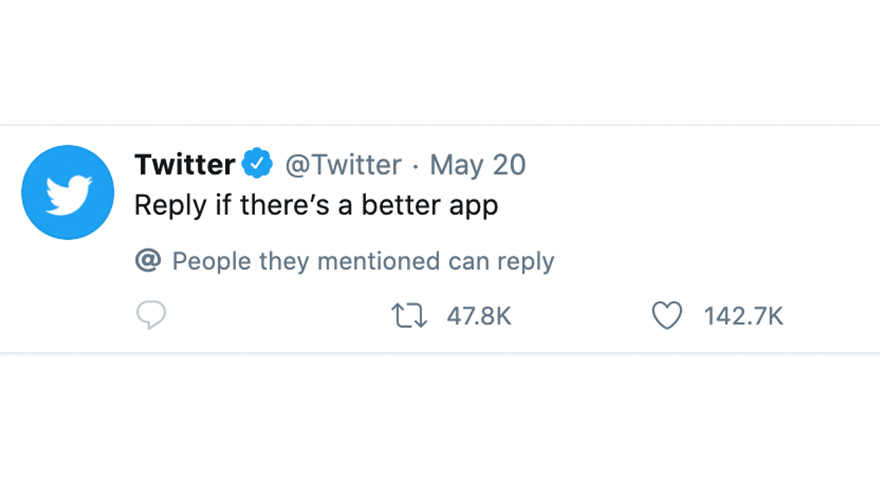

In [481]:
import pandas as pd
#open the dataframe using pandas
train_df = pd.read_csv('datascience_seg/utkmls-twitter-spam-detection-competition/train-tweets.csv', delimiter= ',', header = 0)
test_df = pd.read_csv('datascience_seg/utkmls-twitter-spam-detection-competition/test-tweets.csv')

train_df = train_df.drop('Unnamed: 7', axis=1)
train_df = train_df.drop('location', axis=1)
train_df.head()

Tweet  following  followers  \
0                     Good Morning Love  @LeeBrown_V     0.0000     0.0000   
1           '@realDonaldTrump @USNavy RIP TO HEROES' 42096.0000 61060.0000   
2  Haven't been following the news but I understa...     0.0000     0.0000   
3  pic.twitter.com/dy9q4ftLhZ What to do with pap...     0.0000     0.0000   
4  #DidYouKnow ‚ñ∫ Mahatma Gandhi made a brief visi... 17800.0000 35100.0000   

    actions  is_retweet     Type  
0    0.0000      0.0000  Quality  
1 5001.0000      0.0000     Spam  
2       NaN      0.0000  Quality  
3    0.0000      0.0000  Quality  
4       NaN      0.0000  Quality

In [483]:
test_df = test_df.drop('Id', axis=1)
test_df = test_df.drop('location', axis=1)
test_df.head()

Tweet  following  followers  \
0  Cops shoot blacks almost everyday, and there a...  5509.0000  5977.0000   
1  #HAPPYTAEYANGDAY  Oppa,happy birthday to you, ...     0.0000     0.0000   
2  RT @HoneyBadger10: Panthers in the super bowl....   471.0000   229.0000   
3  Sorry my Twitter keeps posting my retweets a m...     0.0000 79800.0000   
4  Heart attack causes and symptoms are different...   902.0000  5797.0000   

    actions  is_retweet  
0 8062.0000           1  
1       NaN           0  
2  747.0000           0  
3   48.0000           0  
4 4270.0000           0

## Explora√ß√£o e limpeza

Spam count: 7443 (49.96%)
Quality count: 7454 (49.96%)


<AxesSubplot:>

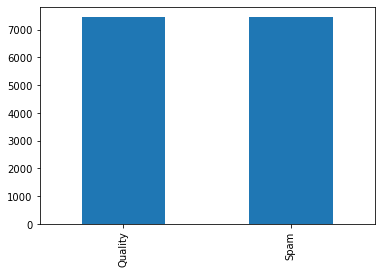

In [3]:
spam_count = len(train_df.loc[train_df['Type'] == 'Spam'])
non_spam_count = len(train_df.loc[train_df['Type'] == 'Quality'])
total = spam_count + non_spam_count

print("Spam count: {} ({:.2f}%)".format(spam_count, spam_count/total*100))
print("Quality count: {} ({:.2f}%)".format(non_spam_count, spam_count/total*100))

#remove south dakota label
train_df = train_df.loc[train_df['Type'] != 'South Dakota']
train_df.reset_index()

train_df['Type'].value_counts().plot(kind='bar')

In [4]:
#set the float print format
pd.set_option('float_format', '{:.4f}'.format)
train_df.describe()

following      followers     actions  is_retweet
count   14739.0000     14880.0000  11461.0000  14896.0000
mean     4695.4300    353490.5045   6992.5234      0.2498
std     31898.3437   3890712.0545  15804.4514      0.4329
min         0.0000         0.0000      0.0000      0.0000
25%         0.0000         0.0000     13.0000      0.0000
50%        74.0000       803.0000   1496.0000      0.0000
75%      3023.0000     13049.2500   6693.0000      0.0000
max   1600000.0000 105000000.0000 165599.0000      1.0000

In [5]:
#count nans 
print("NANs train_df")
print('===================')
print(train_df.isna().sum())

import numpy as np 

#replace NANs with median
train_df['following'].fillna(train_df['following'].median(), inplace=True)
train_df['followers'].fillna(train_df['followers'].median(), inplace=True)
train_df['actions'].fillna(  train_df['actions'].median(), inplace=True)
train_df['is_retweet'].fillna(0, inplace=True)

print('-------------------')
print(train_df.isna().sum())


#count nans 
# print('\n===================')
# print("NANs test_df")
# print('===================')
# print(test_df.isna().sum())

#replace NANs with median
test_df['following'].fillna(test_df['following'].median(), inplace=True)
test_df['followers'].fillna(test_df['followers'].median(), inplace=True)
test_df['actions'].fillna(  test_df['actions'].median(), inplace=True)

# print('-------------------')
# print(test_df.isna().sum())

NANs train_df
Tweet            0
following      158
followers       17
actions       3436
is_retweet       1
Type             0
dtype: int64
-------------------
Tweet         0
following     0
followers     0
actions       0
is_retweet    0
Type          0
dtype: int64


## Extra√ß√£o de Caracter√≠sticas
---

Extrair caracteristicas:  

*   Palavras: 
  *   N√∫mero de palavras [OK]
  *   Raz√£o de # por total de palavras [OK] 
  *   N√∫mero de palavras da lista de palavras de spam  
  *   Razao URL por palavras [OK]

* Caracteres N√∫mericos: 
  *   N√∫mero de caracteres numericos [OK]
  *   Numero de caracteres que sao numeros [WTF?]

* URLs: 
  *   N√∫mero de urlS [OK]

* Tweet:
  *   N√∫mero de mencoes [OK]
  *   Numero de #s [OK]
  *   Quantas vezes foi retweetado [VAI DA NAO]
  *   Tweet postado com reply  [VAI DA NAO]



In [54]:
import re
def find_url(string):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?¬´¬ª‚Äú‚Äù‚Äò‚Äô]))"
    url = re.findall(regex, string)      

    return url 

def has_url(string):
    return len(find_url(string)) > 0
   
def count_url(string):
    return len(find_url(string))

def count_words(string):
    words = string.split(' ')  

    return len(words)

def find_hashtag(string):
    regex = r"\B(\#[a-zA-Z]+\b)"
    hashtags = re.findall(regex, string)
  
    return hashtags

def count_hashtags(string: str):
    return len(find_hashtag(string))

def hashtag_per_word_ratio(string: str):
    hashtags_num = count_hashtags(string)
    words_num = count_words(string)

    return hashtags_num / words_num

def URL_per_word_ratio(string):
    urls_num = count_url(string)
    word_num = count_words(string)

    return urls_num / word_num

def count_numbers(string):
    #can't find decimal numbers 
    regex = "[0-9]+"
    numbers = re.findall(regex, string)
  
    return len(numbers)
  
def count_mentions(string):
    regex = r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)"
    mentions = re.findall(regex, string)

    return len(mentions)

#test find_url
string_test = 'me acha aqui https://dwefe.co eu tb porfaaa t.co/ddhdhy xuu :D'
print('URLs should be [https://dwefe.co, t.co/ddhdhy], find_url give: {}'.format([''.join(i) for i in find_url(string_test)]))

#test count_words
string_test = 'Ol√° eu sou uma string, com varias palavras foda. Mico-leao-dourado. E esse regex hein... Bem loco'
print('Count should be 16, count give: {}'.format(count_words(string_test)))

#test find_hashtags
string_test = 'Ol√° eu sou uma #hashtag, com #hashtag varias #palavrasFoda. #Mico-leao-dourado. #EEss<13e #regex #hashtagTeste regex hein... Bem loco'
print('Count should be 7, count give: {}'.format(count_hashtags(string_test)))

string_test = "Ol√° eu sou um4 str1n6 c0m v4ri0s num3r0s 123 2,2 #10"
print("Count should be 15 or 11 it was: ", count_numbers(string_test))

string_test = "Olar @fulano eu sou uma @stringdeTeste por@favor @meTesta umemail@gmail.com www.url@estr@nh@!"
print("Count should be 3 it was: ", count_mentions(string_test))

URLs should be [https://dwefe.co, t.co/ddhdhy], find_url give: ['https://dwefe.co', 't.co/ddhdhy']
Count should be 16, count give: 16
Count should be 7, count give: 7
Count should be 15 or 11 it was:  12
Count should be 3 it was:  3


In [7]:
train_df['words'] = train_df['Tweet'].apply(count_words)
train_df['hashtags'] = train_df['Tweet'].apply(count_hashtags)
train_df['hashtag_ratio'] = train_df['Tweet'].apply(hashtag_per_word_ratio)

train_df['URLs'] = train_df['Tweet'].apply(count_url)
train_df['URL_ratio'] = train_df['Tweet'].apply(URL_per_word_ratio)

train_df['numbers'] = train_df['Tweet'].apply(count_numbers)
train_df['mentions'] = train_df['Tweet'].apply(count_mentions)

new_columns = ['Tweet', 'following', 'followers', 'actions', 'is_retweet',
       'words', 'hashtags', 'hashtag_ratio', 'URLs', 'URL_ratio',
       'numbers', 'mentions', 'Type']

#new_columns = ['Tweet', 'following', 'followers', 'actions', 'is_retweet',
#       'words', 'hashtags', 'URLs',
#       'numbers', 'mentions', 'Type']

#reorder the columns
train_df = train_df[new_columns]
train_df.head()

Tweet  following  followers  \
0                     Good Morning Love  @LeeBrown_V     0.0000     0.0000   
1           '@realDonaldTrump @USNavy RIP TO HEROES' 42096.0000 61060.0000   
2  Haven't been following the news but I understa...     0.0000     0.0000   
3  pic.twitter.com/dy9q4ftLhZ What to do with pap...     0.0000     0.0000   
4  #DidYouKnow ‚ñ∫ Mahatma Gandhi made a brief visi... 17800.0000 35100.0000   

    actions  is_retweet  words  hashtags  hashtag_ratio  URLs  URL_ratio  \
0    0.0000      0.0000      5         0         0.0000     0     0.0000   
1 5001.0000      0.0000      5         0         0.0000     0     0.0000   
2 1496.0000      0.0000     14         1         0.0714     0     0.0000   
3    0.0000      0.0000     12         2         0.1667     2     0.1667   
4 1496.0000      0.0000     17         2         0.1176     0     0.0000   

   numbers  mentions     Type  
0        0         1  Quality  
1        0         2     Spam  
2        0         0  Quality  
3        2         0  Quality  
4        2         1  Quality

In [8]:
test_df['words'] = test_df['Tweet'].apply(count_words)
test_df['hashtags'] = test_df['Tweet'].apply(count_hashtags)
test_df['hashtag_ratio'] = test_df['Tweet'].apply(hashtag_per_word_ratio)

test_df['URLs'] = test_df['Tweet'].apply(count_url)
test_df['URL_ratio'] = test_df['Tweet'].apply(URL_per_word_ratio)

test_df['numbers'] = test_df['Tweet'].apply(count_numbers)
test_df['mentions'] = test_df['Tweet'].apply(count_mentions)

test_df.head()

Tweet  following  followers  \
0  Cops shoot blacks almost everyday, and there a...  5509.0000  5977.0000   
1  #HAPPYTAEYANGDAY  Oppa,happy birthday to you, ...     0.0000     0.0000   
2  RT @HoneyBadger10: Panthers in the super bowl....   471.0000   229.0000   
3  Sorry my Twitter keeps posting my retweets a m...     0.0000 79800.0000   
4  Heart attack causes and symptoms are different...   902.0000  5797.0000   

    actions  is_retweet  words  hashtags  hashtag_ratio  URLs  URL_ratio  \
0 8062.0000           1     18         2         0.1111     0     0.0000   
1 1638.0000           0      7         1         0.1429     1     0.1429   
2  747.0000           0     11         1         0.0909     0     0.0000   
3   48.0000           0     10         0         0.0000     0     0.0000   
4 4270.0000           0     11         1         0.0909     0     0.0000   

   numbers  mentions  
0        0         0  
1        1         0  
2        1         1  
3        0         0  
4        0         0

## Salvando dataset limpo

In [9]:
#save datasets
train_df.to_csv('datascience_seg/utkmls-twitter-spam-detection-competition/train-tweets-clean.csv', sep = ',', header=True, index=False)
test_df.to_csv('datascience_seg/utkmls-twitter-spam-detection-competition/test-tweets-clean.csv', sep = ',', header=True, index=False)

## Analise de URLs nos tweets 

- Porcentagem de tweets com urls divididos por classe 
- Rela√ß√£o entre tamanho do tweet e tamanho do url 

Spams that have URLs
True    0.6119
False   0.3881
Name: Tweet, dtype: float64

Non-spam that have URLs
True    0.5237
False   0.4763
Name: Tweet, dtype: float64
Count tweet that have URLs


spam counts  spam %  non-spam counts  non-spam %
0    2889.0000 38.8150             3550     47.6254
1    2973.0000 39.9436             3288     44.1105
2    1525.0000 20.4891              593      7.9555
3      56.0000  0.7524               17      0.2281
4          NaN     NaN                5      0.0671
5          NaN     NaN                1      0.0134

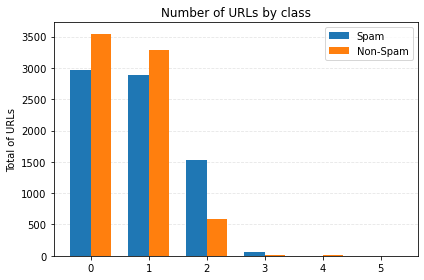

In [10]:
#filter by class 
spam = train_df.loc[train_df['Type'] == 'Spam']
non_spam = train_df.loc[train_df['Type'] == 'Quality']

#how many tweets have urls per class
spam_urls     = spam['Tweet'].apply(has_url)
non_spam_urls = non_spam['Tweet'].apply(has_url)

print('Spams that have URLs')
print(spam_urls.value_counts(normalize = True))

print('\nNon-spam that have URLs')
print(non_spam_urls.value_counts(normalize = True))


print('Count tweet that have URLs')
spam_urls = pd.concat([spam['URLs'].value_counts(),
                       spam['URLs'].value_counts(normalize = True).mul(100), 
                       non_spam['URLs'].value_counts(), 
                       non_spam['URLs'].value_counts(normalize = True).mul(100)], 
                       axis = 1, keys = ('spam counts', 'spam %', 'non-spam counts', 'non-spam %'))
display(spam_urls)

#spam_urls = spam
#quality_urls = non_spam

# URL_count_spam = pd.concat([spam['URLs'].value_counts(),
#                             spam['URLs'].value_counts(normalize = True).mul(100)], 
#                             axis=1, keys = ('counts', 'percentage'))

# URL_count_quality = pd.concat([non_spam['URLs'].value_counts(),
#                                non_spam['URLs'].value_counts(normalize = True).mul(100)],
#                               axis=1, keys = ('counts', 'percentage'))

# print(URL_count_spam)
# print(URL_count_quality)

URL_count_spam = spam['URLs'].value_counts().to_list()
URL_count_quality = non_spam['URLs'].value_counts().to_list()

while(len(URL_count_quality) > len(URL_count_spam)):
    URL_count_spam.append(0)

import matplotlib.pyplot as plt

labels = ['0', '1', '2', '3', '4', '5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, URL_count_spam, width, label='Spam')
rects2 = ax.bar(x + width/2, URL_count_quality, width, label='Non-Spam')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total of URLs')
ax.set_title('Number of URLs by class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

fig.tight_layout()

plt.show()


## An√°lise de Hashtags

In [11]:
print('Count hashtags')

count_hashtags = pd.concat([spam['hashtags'].value_counts(),
                       spam['hashtags'].value_counts(normalize = True).mul(100), 
                       non_spam['hashtags'].value_counts(), 
                       non_spam['hashtags'].value_counts(normalize = True).mul(100)], 
                       axis = 1, keys = ('spam', 'spam %', 'non-spam', 'non-spam %'))
display(count_hashtags)


Count hashtags


spam  spam %  non-spam  non-spam %
0   3855 51.7936 5849.0000     78.4679
1   2638 35.4427  984.0000     13.2010
2    691  9.2839  360.0000      4.8296
3    137  1.8407  137.0000      1.8379
4     57  0.7658   67.0000      0.8988
5     31  0.4165   34.0000      0.4561
6     13  0.1747   17.0000      0.2281
7      5  0.0672    1.0000      0.0134
8      8  0.1075    3.0000      0.0402
9      3  0.0403    2.0000      0.0268
10     2  0.0269       NaN         NaN
11     3  0.0403       NaN         NaN

## Machine Learning ‚úã‚ö°üß†

### Abrindo base limpa

In [104]:
import pandas as pd

df = pd.read_csv('datascience_seg/utkmls-twitter-spam-detection-competition/train-tweets-clean.csv', delimiter = ',')
df

Tweet  following  \
0                         Good Morning Love  @LeeBrown_V     0.0000   
1               '@realDonaldTrump @USNavy RIP TO HEROES' 42096.0000   
2      Haven't been following the news but I understa...     0.0000   
3      pic.twitter.com/dy9q4ftLhZ What to do with pap...     0.0000   
4      #DidYouKnow ‚ñ∫ Mahatma Gandhi made a brief visi... 17800.0000   
...                                                  ...        ...   
14892  #AllWentWrongWhen I told my hair stylist to "g...   695.0000   
14893  They don't have to like you, and you don't hav...     0.0000   
14894  #Miami Graham Nash Live at Parker Playhouse  #...  5647.0000   
14895  @bethannhamilton is in the business of one-upp...     0.0000   
14896    Chasing Success  by  Space Cadetz  Listen up...  1219.0000   

       followers   actions  is_retweet  words  hashtags  hashtag_ratio  URLs  \
0         0.0000    0.0000      0.0000      5         0         0.0000     0   
1     61060.0000 5001.0000      0.0000      5         0         0.0000     0   
2         0.0000 1496.0000      0.0000     14         1         0.0714     0   
3         0.0000    0.0000      0.0000     12         2         0.1667     2   
4     35100.0000 1496.0000      0.0000     17         2         0.1176     0   
...          ...       ...         ...    ...       ...            ...   ...   
14892   533.0000  868.0000      1.0000      9         1         0.1111     0   
14893     0.0000    0.0000      0.0000     12         0         0.0000     0   
14894 15091.0000 5823.0000      0.0000      9         2         0.2222     0   
14895     0.0000 1496.0000      0.0000     15         0         0.0000     0   
14896   957.0000 4077.0000      1.0000     14         0         0.0000     1   

       URL_ratio  numbers  mentions     Type  
0         0.0000        0         1  Quality  
1         0.0000        0         2     Spam  
2         0.0000        0         0  Quality  
3         0.1667        2         0  Quality  
4         0.0000        2         1  Quality  
...          ...      ...       ...      ...  
14892     0.0000        0         0     Spam  
14893     0.0000        0         0  Quality  
14894     0.0000        0         0     Spam  
14895     0.0000        0         1  Quality  
14896     0.0714        2         0     Spam  

[14897 rows x 13 columns]

### Sobre o is_retweet
#### Existem duas op√ß√µes de retweet. A primeira √© uma c√≥pia exata do tweet e a segunda vc faz um coment√°rio desse tweet e o tweet original vai como um link. Por isso alguns tweets que o campo is_retweet est√° como True pode ou n√£o ter uma url levando a um outro tweet.

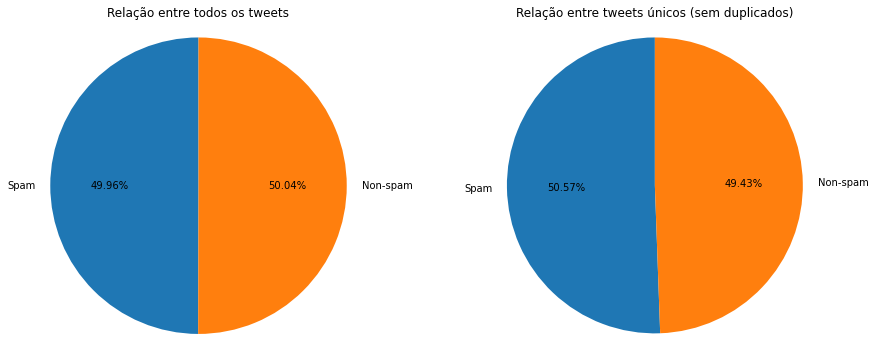

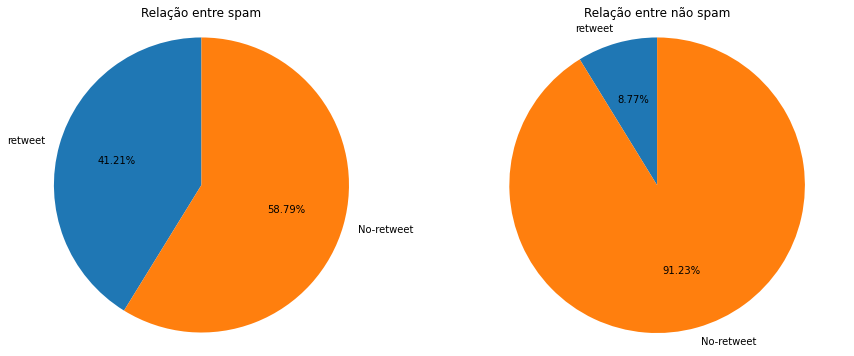

In [182]:
def pie_chart_tweets(df1, df2, column, comp1, comp2, labels, description):
    spam = len(df1[df1[column] == comp1])
    non_spam = len(df1[df1[column] == comp2])
    all_sizes = [spam/len(df1), non_spam/len(df1)]
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    axes[0].set_title(description[0])
    axes[0].pie(all_sizes, labels=labels, autopct='%1.2f%%', startangle=90)
    axes[0].axis('equal')
    
    spam = len(df2[df2[column] == comp1])
    non_spam = len(df2[df2[column] == comp2])
    unique_sizes = [spam/len(df2), non_spam/len(df2)]

    axes[1].set_title(description[1])
    axes[1].pie(unique_sizes, labels=labels, autopct='%1.2f%%', startangle=90)
    axes[1].axis('equal')

    plt.show()

labels = 'Spam', 'Non-spam'
description = ["Rela√ß√£o entre todos os tweets", "Rela√ß√£o entre tweets √∫nicos (sem duplicados)"]
df_unique = df.drop_duplicates(subset="Tweet")
pie_chart_tweets(df, df_unique, "Type", "Spam", "Quality", labels, description)

labels = 'retweet', 'No-retweet'
description = ["Rela√ß√£o entre spam", "Rela√ß√£o entre n√£o spam"]
pie_chart_tweets(df[df["Type"] == "Spam"], df[df["Type"] == "Quality"], "is_retweet", 1, 0, labels, description)

### Rela√ß√£o entre follower e following

# MEU DEUS ISSO AQUI N√ÉO FUNCIONAAA

<ipython-input-427-a0ab92534694>:25: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  condition = tweet_type[tweet_type["div"].between(ant, i, inclusive=True)]


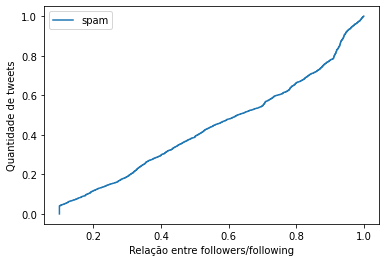

In [427]:
def get_follower_per_following_plot(df, limit, num, den):
    list_test = []
    list2_test = []

    df_copy = df.copy()
    df_copy = df_copy.loc[:, ["followers", "following", "Type"]]
    #df_copy[num] = df_copy[num].replace(0, 1)
    df_copy["div"] = df_copy[num]/df_copy[den]
    df_copy["div"] = df_copy["div"].fillna(1)
    
    df_copy["div"] = pd.to_numeric(df_copy["div"], downcast="float")

    tweets = {
        "Spam": [],
        "Quality": []
    }
    #Spammers try to follow a large number of users as attempt to be followed back
    #following is bigger then followers
    for tp, l in tweets.items():
        x_label = []
        tweet_type = df_copy[df_copy['Type'] == tp]
        ant = 0
        for i in limit:
            #print(f"verificando entre {ant} e {i}")
            condition = tweet_type[tweet_type["div"].between(ant, i, inclusive=True)]
            count_values = len(condition)
            a = [i]*count_values
            #l.append(count_values)
            l.extend(a)
            x_label.append(str(i))
            
            ant = i
        
        l = sorted(l)
        #print(l)
        
    #calculate CDF values
    y = 1. * np.arange(len(tweets["Spam"])) / (len(tweets["Spam"]) - 1)
    plt.plot(tweets["Spam"], y, label = "spam")
    
    #plt.yscale('log')
    #plt.xscale('log')
    plt.legend()
    plt.xlabel(f"Rela√ß√£o entre {num}/{den}")
    plt.ylabel('Quantidade de tweets')
    #plt.xticks(y, x_label)

    plt.show()

    #limit = np.arange(1, len(limit)+1, 1)
    
    
    # width = 0.3
    #----------------- BARRA
    #fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
    #For all tweets
    #print(f"ALL spam tweets: {all_tweets['Spam']}")
    #print(f"ALL Quality tweets: {all_tweets['Quality']}")
    #axes.bar(limit, tweets["Spam"], width, label = "spam")
    #axes.bar(limit + width, tweets["Quality"], width, label = "non-spam")

    #axes.set_title("Rela√ß√£o entre todos os tweets")
    #axes.set_yscale('log')
    #axes.set_xscale('log')
    #axes.legend()
    #axes.set_xlabel(f"Rela√ß√£o entre {num}/{den}")
    #axes.set_ylabel('Quantidade de tweets')
    #axes.set_xticks(limit)

    #----------------- LINHA
    #plt.plot(limit, tweets["Spam"], label = "spam")
    #plt.plot(limit, tweets["Quality"], label = "non-spam")

    #plt.yscale('log')
    #plt.xscale('log')
    #plt.legend()
    #plt.xlabel(f"Rela√ß√£o entre {num}/{den}")
    #plt.ylabel('Quantidade de tweets')
    #plt.xticks(limit, x_label)

    #plt.show()

#grafico do teste followers/following
limit = [0.05, 0.2, 0.5, 1, 2, 5, 25, 125]
limit = np.array(limit)
limit = np.arange(0.1, 1, 0.001)
get_follower_per_following_plot(df, limit, 'followers', 'following')

In [383]:
import matplotlib
matplotlib.__version__

'3.4.3'

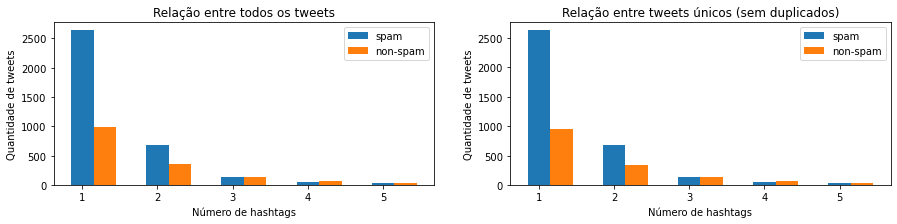

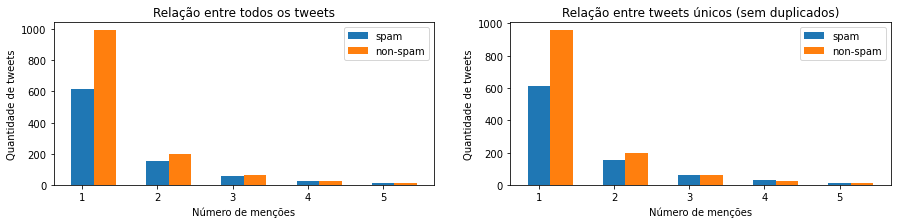

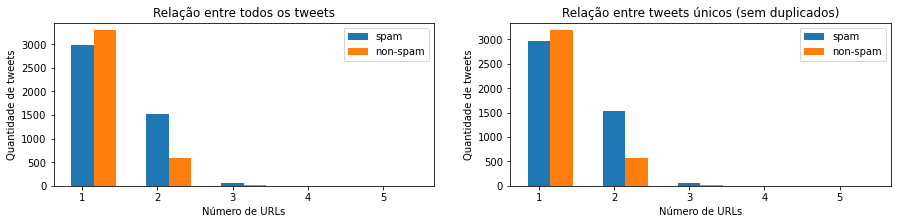

In [138]:
def count_col(df, num):
    tweets = {
        "Spam": [],
        "Quality": []
    }
    for tp, l in tweets.items():
        all_tweets = df[df['Type'] == tp]
        for i in limit:
            count_values = len(all_tweets[all_tweets[num] == i])
            l.append(count_values)
    
    return tweets

def get_col_counts_plot(df, limit, num, description):
    list_test = []
    list2_test = []

    all_tweets = count_col(df, num)
    unique_tweets = count_col(df.drop_duplicates(subset="Tweet"), num)
    
    width = 0.3
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
    
    #For all tweets
    #print(f"ALL spam tweets: {all_tweets['Spam']}")
    #print(f"ALL Quality tweets: {all_tweets['Quality']}")
    axes[0].bar(limit, all_tweets["Spam"], width, label = "spam")
    axes[0].bar(limit + width, all_tweets["Quality"], width, label = "non-spam")

    axes[0].set_title("Rela√ß√£o entre todos os tweets")
    axes[0].set_yscale('log')
    axes[0].legend()
    axes[0].set_xlabel(description)
    axes[0].set_ylabel('Quantidade de tweets')
    axes[0].set_xticks(limit)
    
    #For unique tweets
    #print(f"UNIQUE spam tweets: {unique_tweets['Spam']}")
    #print(f"UNIQUE Quality tweets: {unique_tweets['Quality']}")
    axes[1].bar(limit, unique_tweets["Spam"], width, label = "spam")
    axes[1].bar(limit + width, unique_tweets["Quality"], width, label = "non-spam")
    
    axes[1].set_title("Rela√ß√£o entre tweets √∫nicos (sem duplicados)")
    axes[1].set_yscale('log')
    axes[1].legend()
    axes[1].set_xlabel(description)
    axes[1].set_ylabel('Quantidade de tweets')
    axes[1].set_xticks(limit)

    plt.show()
    #print("-"*20)

#grafico do teste followers/following
limit = np.arange(1, 6, 1)
get_col_counts_plot(df, limit, 'hashtags', "N√∫mero de hashtags")
limit = np.arange(1, 6, 1)
get_col_counts_plot(df, limit, 'mentions', "N√∫mero de men√ß√µes")
limit = np.arange(1, 6, 1)
get_col_counts_plot(df, limit, 'URLs', "N√∫mero de URLs")

In [474]:
def get_all_infos(df, tp, func):
    spam = df[df["Type"] == tp]
    
    all_urls = {}
    for tweet in df["Tweet"]:
        urls = []
        try:
            urls = [''.join(i) for i in func(tweet)]
        except Exception as ex:
            pass
        else:
            for u in urls:
                if u in all_urls:
                    all_urls[u] += 1
                else:
                    all_urls[u] = 1

    return all_urls

def get_ranking(rank_dict, rank, columns):
    rank_dict = dict(sorted(rank_dict.items(), key=lambda x: x[1], reverse=True))
    
    keys = []
    values = []
    for i, v in enumerate(rank_dict):
        if i == 5:
            break
        keys.append(v)
        values.append((rank_dict[v]))
    
    return pd.DataFrame(list(zip(keys, values)), index=np.arange(1, rank+1, 1), columns=columns)

all_hashtags = get_all_infos(df, "Spam", find_hashtag)
get_ranking(all_hashtags, 5, ["Hashtags", "Quantidade"])

Hashtags  Quantidade
1      #news         477
2    #sports         196
3  #politics         151
4     #local         100
5     #world          97

In [479]:
all_urls = get_all_infos(df, "Spam", find_url)
#salva todas as URLs em um arquivo texto para ser processada por um analisador de urls
with open("./datascience_seg/unknow_urls.txt", "w") as f:
    for url, v in all_urls.items():
        f.write(f"{url}\n")

get_ranking(all_urls, 5, ["URLs", "Quantidade"])

URLs  Quantidade
1                   https://t.co/eMX9JgTv3v          12
2                        http://yg-life.com          12
3  HAPPYBAEBAEDAYpic.twitter.com/Lib0qxwsyr          12
4                   https://t.co/1KPXto2HfW           8
5               mpic.twitter.com/C9lC69C4WD           8

In [278]:
def get_data_info(data_df, tweet_type):
    #todos os tweets do tipo 'tweet_type'
    only_tweet_type = data_df[data_df['Type'] == tweet_type]
    
    #tweets que possuem urls
    tweet_url = only_tweet_type[only_tweet_type['URLs'] > 0]
    #tweets que possuem mais de 1 urls
    more_one_url = only_tweet_type[only_tweet_type['URLs'] > 1]
    
    #quantidade de tweets do tipo 'tweet_type'
    tweet_count = len(only_tweet_type)

    #quantidade de tweets com url
    tweet_url_count = len(tweet_url)
    #quantidade de tweets com mais de uma url
    tweet_more_one_url_count = len(more_one_url)
    
    #tweets unicos (sem repeti√ß√£o)
    unique_tweet = only_tweet_type['Tweet'].unique()
    #quantidade de tweets unicos (sem repeti√ß√£o)
    unique_tweet_count = len(unique_tweet)
    
    return [
        f"{tweet_count} ({(tweet_count/len(data_df))*100:.2f}%)",
        unique_tweet_count,
        f"{(unique_tweet_count/tweet_count)*100:.2f}%",
        tweet_url_count,
        f"{(tweet_url_count/tweet_count)*100:.2f}%",
        tweet_more_one_url_count,
        f"{(tweet_more_one_url_count/tweet_url_count)*100:.2f}%"
    ]

In [279]:
def create_info_table(df):
    spam = get_data_info(df, "Spam")
    non_spam = get_data_info(df, "Quality")

    index = [
        "Tweets identificados",
        "Tweets √∫nicos (sem repeti√ß√£o)",
        "Tweets √∫nicos/identificados",
        "Total de urls",
        "urls/identificados",
        "mais de 1 url", 
        "mais de 1 url/total de urls"
    ]
    return pd.DataFrame(list(zip(spam, non_spam)), index=index, columns=["spam", "non-spam"])
    
result_df = create_info_table(df)
result_df

spam       non-spam
Tweets identificados           7443 (49.96%)  7454 (50.04%)
Tweets √∫nicos (sem repeti√ß√£o)           7424           7256
Tweets √∫nicos/identificados           99.74%         97.34%
Total de urls                           4554           3904
urls/identificados                    61.19%         52.37%
mais de 1 url                           1581            616
mais de 1 url/total de urls           34.72%         15.78%

### Prepara√ß√£o dos Dados

In [18]:
n_columns = len(df.columns)

#filter data to that will be used by the model
X = df.iloc[:, 1: n_columns - 1] 
y = df['Type']

#binarize the labels 
from sklearn.preprocessing import LabelBinarizer
#Quality -> 0 
#Spam -> 1
lb = LabelBinarizer()
y = lb.fit_transform(y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 13)

print('Len train: {} - {:.2f}%'.format(len(y_train), len(y_train)/ len(y)*100))
print('Len test:  {} - {:.2f}%'.format(len(y_test), len(y_test)/ len(y)*100))

import numpy as np 
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test  = np.unique(y_test, return_counts=True)

train_count = dict(zip(unique_train, counts_train))
test_count = dict(zip(unique_test, counts_test))

print('Train count: ', train_count)
print('Test count: ', test_count)

Len train: 9980 - 66.99%
Len test:  4917 - 33.01%
Train count:  {0: 4946, 1: 5034}
Test count:  {0: 2508, 1: 2409}


### Normaliza√ß√£o 

In [19]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

### Treinamento

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

import numpy as np 

np.random.seed(10)

classifiers = {'RandomForest': RandomForestClassifier(), 
               'KNN': KNeighborsClassifier(),
               'MLP' : MLPClassifier(), 
               'SVC' : svm.SVC()}

y_pred = {'RandomForest': [],
          'KNN': [],
          'MLP' : [],
          'SVC' : []}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred[name] = clf.predict(X_test)


<ipython-input-20-70cbeb20c714>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
/home/claudio/anaconda3/envs/datascience/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/claudio/anaconda3/envs/datascience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/claudio/anaconda3/envs/datascience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iter

### Valida√ß√£o

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for name, clf in classifiers.items():
    print(name)
    print(classification_report(y_test, y_pred[name]))
    print(confusion_matrix(y_test, y_pred[name]))   

RandomForest
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2508
           1       0.99      0.99      0.99      2409

    accuracy                           0.99      4917
   macro avg       0.99      0.99      0.99      4917
weighted avg       0.99      0.99      0.99      4917

[[2474   34]
 [  16 2393]]
KNN
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2508
           1       0.83      0.86      0.84      2409

    accuracy                           0.84      4917
   macro avg       0.84      0.84      0.84      4917
weighted avg       0.84      0.84      0.84      4917

[[2086  422]
 [ 347 2062]]
MLP
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2508
           1       0.89      0.90      0.89      2409

    accuracy                           0.90      4917
   macro avg       0.90      0.90      0.90      4917

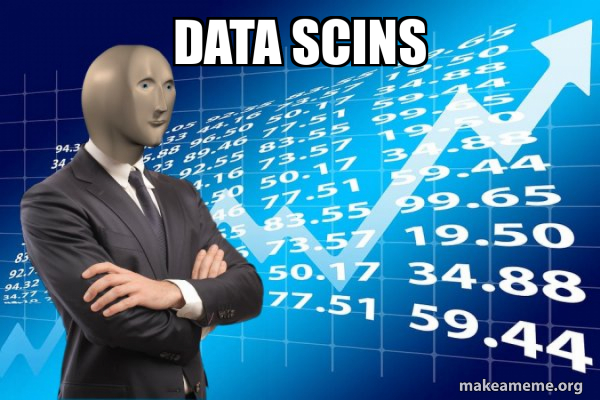

## Avaliando tweets selvagens


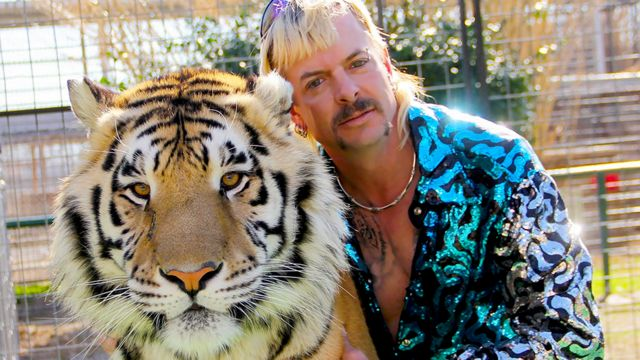

In [429]:
def feature_extraction(df):
    df['words'] = df['Tweet'].apply(count_words)
    df['hashtags'] = df['Tweet'].apply(count_hashtags)
    df['hashtag_ratio'] = df['Tweet'].apply(hashtag_per_word_ratio)

    df['URLs'] = df['Tweet'].apply(count_url)
    df['URL_ratio'] = df['Tweet'].apply(URL_per_word_ratio)

    df['numbers'] = df['Tweet'].apply(count_numbers)
    df['mentions'] = df['Tweet'].apply(count_mentions)

    new_columns = ['Tweet', 'following', 'followers', 'actions', 'is_retweet',
        'words', 'hashtags', 'hashtag_ratio', 'URLs', 'URL_ratio',
        'numbers', 'mentions']

    #reorder the columns
    df = df[new_columns]
  
    return df

type_dict = {'Tweet': str, 'following':int, 'followers':int, 'actions': int, 'is_retweet' : bool, 'tweet_url' : str}
bolso_df = pd.read_csv('datascience_seg/tweets_selvagens/bolsonaro_file.csv', quotechar="'", dtype = type_dict, delimiter = ',', warn_bad_lines=True, error_bad_lines=False)
print(len(bolso_df.index))

bolso_df = feature_extraction(bolso_df)
bolso_df

/home/claudio/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/home/claudio/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 32: expected 7 fields, saw 10\nSkipping line 107: expected 7 fields, saw 8\nSkipping line 196: expected 7 fields, saw 9\nSkipping line 360: expected 7 fields, saw 9\nSkipping line 397: expected 7 fields, saw 8\nSkipping line 605: expected 7 fields, saw 9\nSkipping line 665: expected 7 fields, saw 9\nSkipping line 894: expected 7 fields, saw 8\nSkipping line 927: expected 7 fields, saw 8\nSkipping line 953: expected 7 fields, saw 8\nSkipping line 976: expected 7 fields, saw 8\nSkipping l

2482


Tweet  following  followers  \
0     Primeira Dama Michele Bolsonaro agradecendo a ...       3165       5076   
1             @pattisonbf parece os filhos do bolsonaro        107        529   
2     @folha Quem tentou destruir a democracia foi o...          4          1   
3     @TerraBrasilnot Acho q o imorais precisar ler ...       3975       6606   
4     Rachadinha: suposto ex-funcion√°rio de Carlos B...       2139        566   
...                                                 ...        ...        ...   
2477  Pela fase de grupos da UEFA Champions League, ...          6         28   
2478  Lula √© o maior ladr√£o de todos os tempos...#Lu...        357        471   
2479  @pinto_saullo12 Se queremos derrotar Bolsonaro...      17783      16758   
2480  @TradutordoBR S√≥ observar os que odeiam BOLSON...        206        107   
2481  Corre√ß√£oCompartilhei uma FAKENEWS do Estad√£o, ...       1556       1197   

      actions  is_retweet  words  hashtags  hashtag_ratio  URLs  URL_ratio  \
0         302        True     28         0         0.0000     1     0.0357   
1           0       False      6         0         0.0000     0     0.0000   
2           0       False     40         0         0.0000     0     0.0000   
3           2        True     31         0         0.0000     0     0.0000   
4          53        True     15         0         0.0000     1     0.0667   
...       ...         ...    ...       ...            ...   ...        ...   
2477        0       False     26         0         0.0000     0     0.0000   
2478        7        True     10         1         0.1000     1     0.1000   
2479        0       False     30         0         0.0000     1     0.0333   
2480        0       False     10         0         0.0000     0     0.0000   
2481      675        True     38         0         0.0000     1     0.0263   

      numbers  mentions  
0           3         0  
1           0         1  
2           0         1  
3           0         1  
4           0         0  
...       ...       ...  
2477        5         0  
2478        3         0  
2479        1         1  
2480        1         1  
2481        3         0  

[2482 rows x 12 columns]

In [430]:
bolso_df_copy = bolso_df.copy()
bolso_df_2 = bolso_df_copy.iloc[:, 1:]

min_max_scaler = MinMaxScaler()
bolso_df_2 = min_max_scaler.fit_transform(bolso_df_2)

resultado = classifiers['KNN'].predict(bolso_df_2)
#bolso_df_2.iloc[1]

In [431]:
bolso_df_copy["Type"] = pd.Series(resultado)
bolso_df_copy["Type"].replace({0:"Quality", 1:"Spam"}, inplace=True)
bolso_df_copy

Tweet  following  followers  \
0     Primeira Dama Michele Bolsonaro agradecendo a ...       3165       5076   
1             @pattisonbf parece os filhos do bolsonaro        107        529   
2     @folha Quem tentou destruir a democracia foi o...          4          1   
3     @TerraBrasilnot Acho q o imorais precisar ler ...       3975       6606   
4     Rachadinha: suposto ex-funcion√°rio de Carlos B...       2139        566   
...                                                 ...        ...        ...   
2477  Pela fase de grupos da UEFA Champions League, ...          6         28   
2478  Lula √© o maior ladr√£o de todos os tempos...#Lu...        357        471   
2479  @pinto_saullo12 Se queremos derrotar Bolsonaro...      17783      16758   
2480  @TradutordoBR S√≥ observar os que odeiam BOLSON...        206        107   
2481  Corre√ß√£oCompartilhei uma FAKENEWS do Estad√£o, ...       1556       1197   

      actions  is_retweet  words  hashtags  hashtag_ratio  URLs  URL_ratio  \
0         302        True     28         0         0.0000     1     0.0357   
1           0       False      6         0         0.0000     0     0.0000   
2           0       False     40         0         0.0000     0     0.0000   
3           2        True     31         0         0.0000     0     0.0000   
4          53        True     15         0         0.0000     1     0.0667   
...       ...         ...    ...       ...            ...   ...        ...   
2477        0       False     26         0         0.0000     0     0.0000   
2478        7        True     10         1         0.1000     1     0.1000   
2479        0       False     30         0         0.0000     1     0.0333   
2480        0       False     10         0         0.0000     0     0.0000   
2481      675        True     38         0         0.0000     1     0.0263   

      numbers  mentions     Type  
0           3         0     Spam  
1           0         1  Quality  
2           0         1  Quality  
3           0         1  Quality  
4           0         0     Spam  
...       ...       ...      ...  
2477        5         0  Quality  
2478        3         0     Spam  
2479        1         1  Quality  
2480        1         1  Quality  
2481        3         0     Spam  

[2482 rows x 13 columns]

In [432]:
df_2 = create_info_table(bolso_df_copy)
df_2

spam       non-spam
Tweets identificados           1455 (58.62%)  1027 (41.38%)
Tweets √∫nicos (sem repeti√ß√£o)            517            874
Tweets √∫nicos/identificados           35.53%         85.10%
Total de urls                            985            246
urls/identificados                    67.70%         23.95%
mais de 1 url                             66              7
mais de 1 url/total de urls            6.70%          2.85%

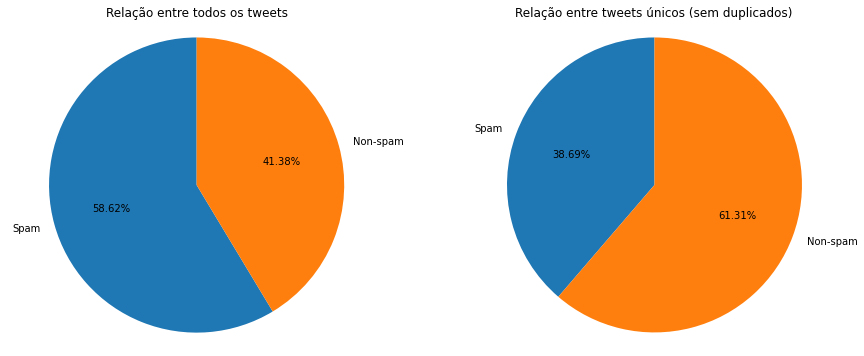

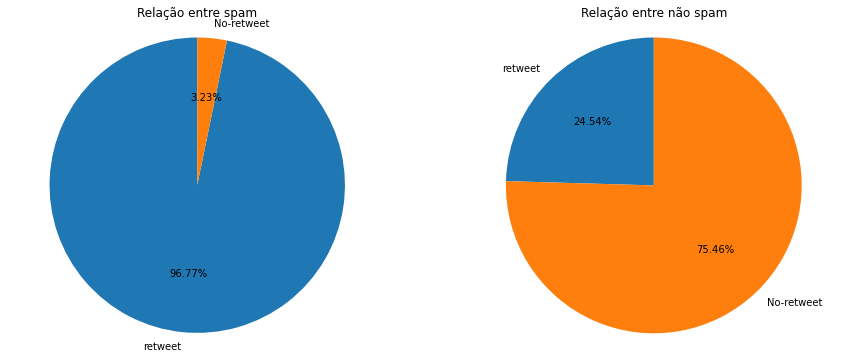

In [433]:
labels = 'Spam', 'Non-spam'
description = ["Rela√ß√£o entre todos os tweets", "Rela√ß√£o entre tweets √∫nicos (sem duplicados)"]
b = bolso_df_copy
pie_chart_tweets(b, b.drop_duplicates(subset="Tweet"), "Type", "Spam", "Quality", labels, description)

labels = 'retweet', 'No-retweet'
description = ["Rela√ß√£o entre spam", "Rela√ß√£o entre n√£o spam"]
b = bolso_df_copy
pie_chart_tweets(b[b["Type"] == "Spam"], b[b["Type"] == "Quality"], "is_retweet", 1, 0, labels, description)

<ipython-input-390-72293b4757f4>:25: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  condition = tweet_type[tweet_type["div"].between(ant, i, inclusive=True)]


[19, 111, 350, 701, 360, 74, 24, 12]
[35, 102, 222, 261, 156, 47, 12, 9]


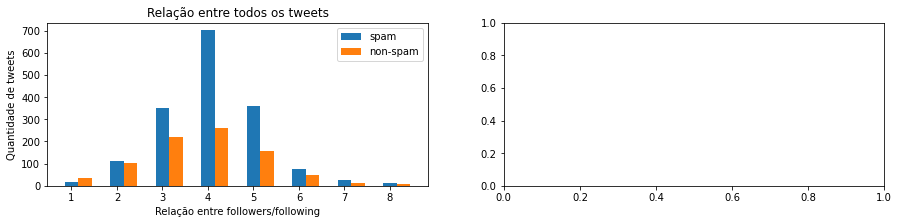

In [392]:
limit = [0.05, 0.2, 0.5, 1, 2, 5, 25, 125]
limit = np.array(limit)
get_follower_per_following_plot(bolso_df_copy, limit, 'followers', 'following')

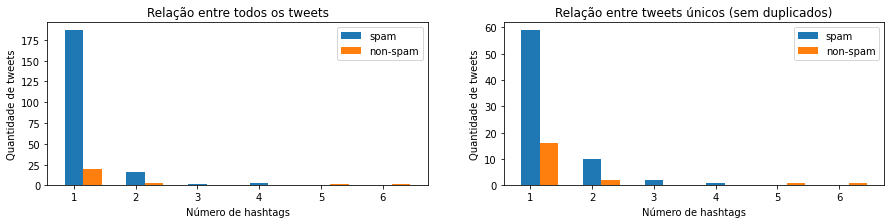

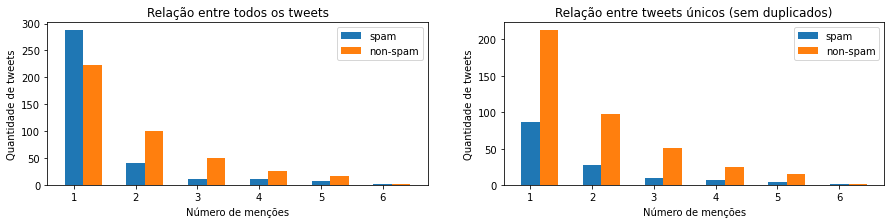

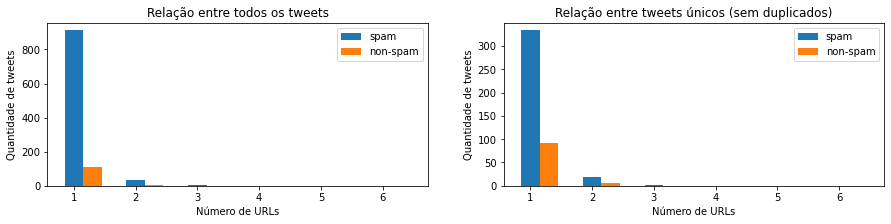

In [169]:
#grafico do teste followers/following
limit = np.arange(1, 7, 1)
get_col_counts_plot(bolso_df_copy, limit, 'hashtags', "N√∫mero de hashtags")
limit = np.arange(1, 7, 1)
get_col_counts_plot(bolso_df_copy, limit, 'mentions', "N√∫mero de men√ß√µes")
limit = np.arange(1, 7, 1)
get_col_counts_plot(bolso_df_copy, limit, 'URLs', "N√∫mero de URLs")

In [170]:
top_hashtags(bolso_df_copy)

Hashtag  Quantidade
1                   #equipeLula          78
2  #LulaEoPTMulheresComDireitos          41
3         #LulaExplosaoNasRedes          23
4                   #LulaLadrao          16
5                 #LulaNoPodpah          16